<a href="https://colab.research.google.com/github/thanachaili/PMU-B-PersonalAI/blob/main/GMM_thanachai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Gaussian Mixture Model Notebook!

Below is an example how to apply Gaussian mixture model in a synthetic dataset.

In [ ]:
# @title
from IPython.display import IFrame

# Replace 'YOUR_FILE_ID' with the actual file ID from your Google Drive shareable link
pdf_file_id = '1fOqTePYhR5Bk3aPlzI83FqMwZG9teoZM'

# Generate the URL for the PDF using the file ID
pdf_url = f"https://drive.google.com/file/d/{pdf_file_id}/preview"

# Embed the PDF using an <iframe> in your Colab notebook
IFrame(pdf_url, width=600, height=400)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

RAND_STATE = 123
np.random.seed(RAND_STATE)

In [ ]:
# Scatter plots with histograms and normal distributions
def viz(data,mu,sd):
  green = '#40909A'
  orange = '#C76C2B'
  alpha = 0.5
  plt.figure()

  data_min = min(min(data[0]),min(data[1]))
  data_max = max(max(data[0]),max(data[1]))

  # Plot the 1st normal
  x = np.linspace(data_min, data_max, 100)
  p = norm.pdf(x, mu[0], sd[0])
  plt.plot(x, p, linewidth=2,color=green)

  # Plot the 2nd normal
  x = np.linspace(data_min, data_max, 100)
  p = norm.pdf(x, mu[1], sd[1])
  plt.plot(x, p, linewidth=2,color=orange)

  # Plot the histograms
  _ = plt.hist(data[0],bins=10,density=True,color=green,alpha=alpha)
  _ = plt.hist(data[1],bins=10,density=True,color=orange,alpha=alpha)

  # Plot the scatters
  plt.plot(data1,np.zeros(len(data[0])),linestyle='None', marker='o',markersize=10,alpha=alpha,c=green)
  plt.plot(data2,np.zeros(len(data[1])),linestyle='None', marker='o',markersize=10,alpha=alpha,c=orange)

  # Remove the frame (borders)
  ax = plt.gca()
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

In [ ]:
# Generate 1D data from two normal distributions
mu = [1,3]
sd = [.8,.5]
data1 = np.random.normal(mu[0], sd[0], size=100)
data2 = np.random.normal(mu[1], sd[1], size=50)

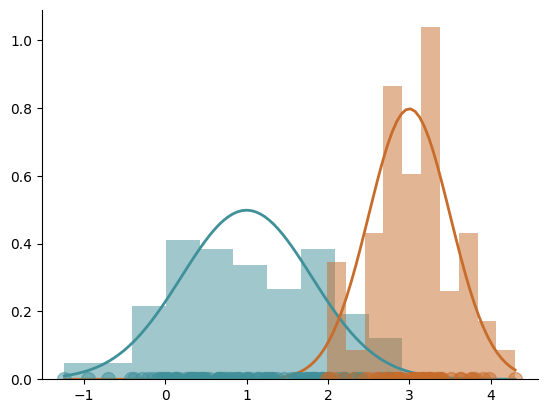

In [ ]:
# Visualize the data generated by the two normal distributions
viz([list(data1)]+[list(data2)],mu,sd)

In [ ]:
# Given the generated data, infer the means and the variances
import numpy as np
data = np.expand_dims(list(data1)+list(data2), axis=1)

## GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, init_params='random_from_data')
gmm.fit(data)

GaussianMixture(init_params='random_from_data', n_components=2)

GMM >>>
p(x) = 0.38Normal(0.41,0.34)+0.62Normal(2.48,0.67)
mu : [0.4121688531287976, 2.4797996529203865]
sd : [0.3373051633519015, 0.67346935130801]


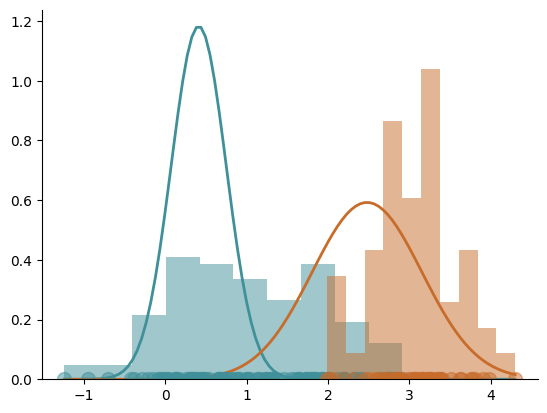

In [ ]:

print('GMM >>>')
### HW: Complete the code below ###
#นำค่าน้ำหนัก (weights) ของ Gaussian components ที่ 1 และ 2 มาใส่ในตัวแปร w1 และ w2
w1,w2 = gmm.weights_[0],gmm.weights_[1] # Q1
#นำค่า mean ของ Gaussian components ที่ 1 และ 2 มาใส่ในตัวแปร mu1 และ mu2
mu1,mu2 = gmm.means_[0],gmm.means_[1] # Q2
#ดึงค่า covariances ของสองส่วนประกอบของ GMM ที่ได้จากการ fit model ซึ่งคือค่าสหสัมพันธ์ (covariances) ของแต่ละส่วนประกอบ
sd1,sd2 = gmm.covariances_[0],gmm.covariances_[1] # Q3

#คำสั่งนี้ทำการพิมพ์ข้อความที่แสดงค่า weights, means, และ covariances ของสองส่วนประกอบของ GMM ที่ได้จากการ fit model เป็นการแสดงผลประมาณการของ GMM ที่ได้
print('p(x) = %.2fNormal(%.2f,%.2f)+%.2fNormal(%.2f,%.2f)' %(w1,mu1,sd1,w2,mu2,sd2))
#แสดงค่า means ของสองส่วนประกอบของ GMM ที่ได้จากการ fit model เป็นลิสต์ที่มีสมาชิกคือ mean ของแต่ละส่วนประกอบ
print(f"mu : {[mu1[0],mu2[0]]}")
#แสดงค่า covariances ของสองส่วนประกอบของ GMM ที่ได้จากการ fit model เป็นลิสต์ที่มีสมาชิกคือ covariance ของแต่ละส่วนประกอบ
print(f"sd : { [sd1[0][0],sd2[0][0]]}")
# Visualize the data and the inferred norms.
viz([list(data1)]+[list(data2)],[mu1[0],mu2[0]] , [sd1[0][0],sd2[0][0]]) # Q4
### End of HW ###



